In [3]:
'''
NOTE: This is a basic stock predictor and only has information up to 2018 because that is when quandl 
started charging for use of its API. 
'''

'''
This cell is meant to keep track of all imports that will be used 
for the stock predictor
'''

import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [4]:
#this is the key that is used to access quandl API
quandl.ApiConfig.api_key='y8rFsHkJZmSapu9F8kVW'

'''
If you want to check another stock be sure you change the quotes below to: "WIKI/(Ticker-Symbol)"
'''
df = quandl.get('WIKI/AMZN') # gets selected stock info from stock public date to 2018
df = df[['Adj. Close']] # gets all the closing prices of the stock up to 2018
df # shows all the closing prices

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


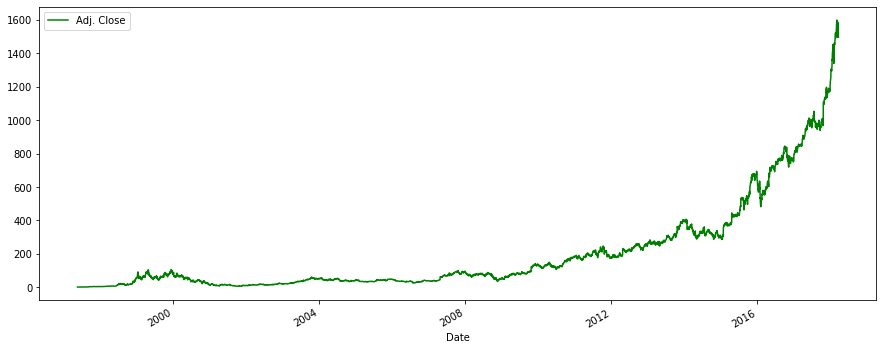

In [5]:
df['Adj. Close'].plot(figsize = (15,6), color = 'g') # plots the closing prices of the stock with a green line
plt.legend(loc = 'upper left') # show a legend on the upper left side of the graph
plt.show() # show the graph 

In [1]:

forecast = 30 # set the number of days you want to see the prediction
df['Prediction'] = df[['Adj. Close']].shift(-forecast) # create a new row called "prediction" that moves 30 spaces to the left

X = np.array(df.drop(['Prediction'],1)) 
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

NameError: name 'df' is not defined

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1499.63111448 1538.45895704 1549.83953159 1535.95119272 1556.84214468
 1572.32440156 1574.27960764 1590.47381456 1613.79814801 1603.20390635
 1603.70333399 1583.51370594 1590.73946756 1615.56208393 1630.47053033
 1638.29135466 1645.580873   1674.30327542 1695.02420947 1684.17494093
 1687.17150677 1677.94803459 1666.64184289 1638.21697182 1682.40037888
 1677.45923307 1637.33500386 1585.75581727 1649.83132101 1587.33910915]


(17282.0, 18029.5)

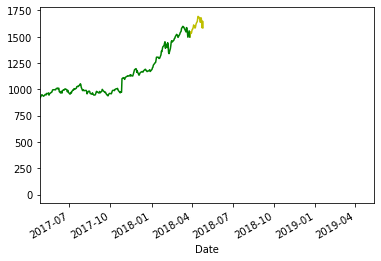

In [16]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color='y')
df['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,4,26))